In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt

2025-11-13 17:43:45.319002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763055825.574758      39 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763055825.645093      39 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
train_file_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
dataset_df = pd.read_csv(train_file_path)
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<Axes: >

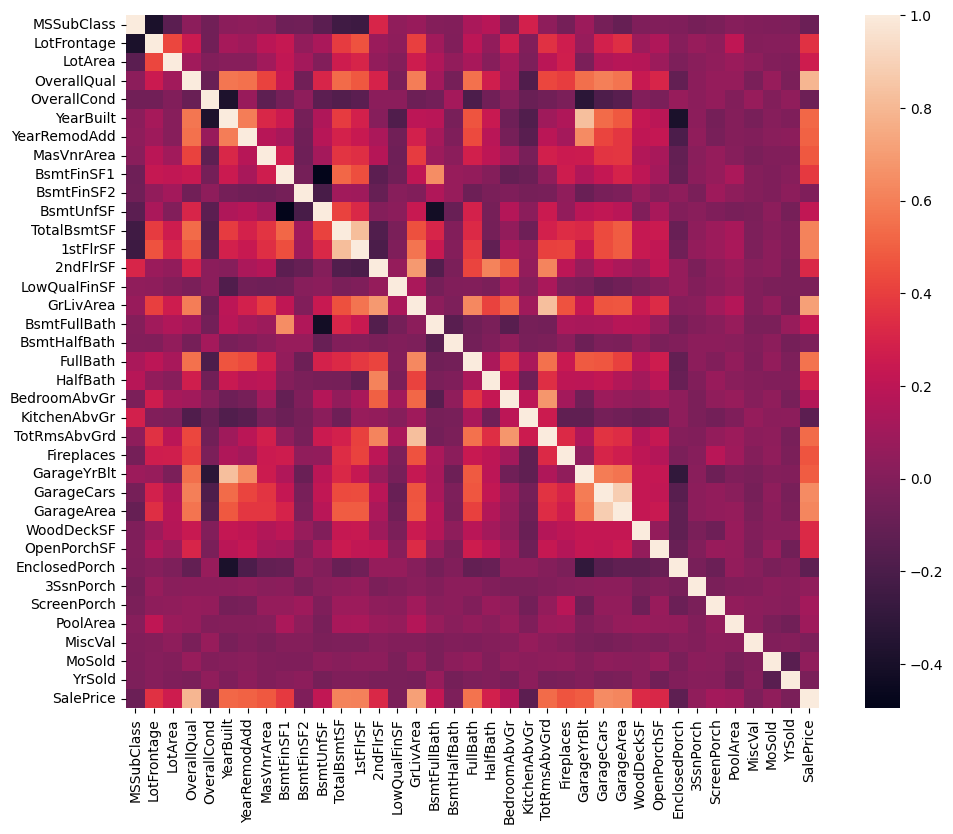

In [8]:
continuous_columns = [column for column in dataset_df.columns if dataset_df[column].dtype in ['int64', 'float64']]
cont_dataset_df = dataset_df[continuous_columns]
corr_map = cont_dataset_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_map, square=True)

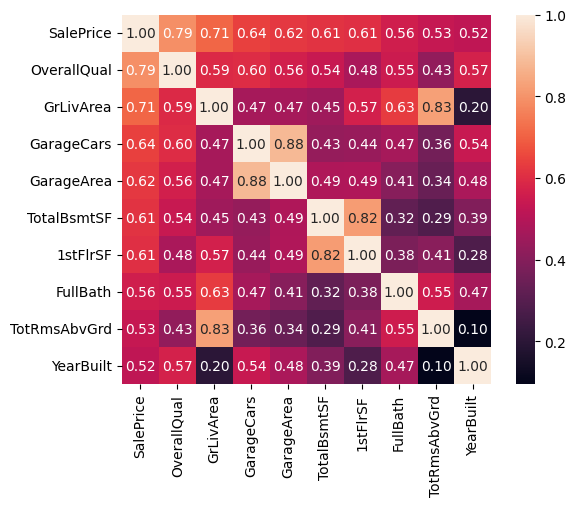

In [9]:
cols = corr_map.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(cont_dataset_df[cols].values.T)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(cont_dataset_df[cols])
plt.show

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<function matplotlib.pyplot.show(close=None, block=None)>

In [11]:
total = dataset_df.isnull().sum().sort_values(ascending=False)
percent = (dataset_df.isnull().sum() / dataset_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [12]:
dataset_df = dataset_df.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
dataset_df = dataset_df.drop(dataset_df.loc[dataset_df['Electrical'].isnull()].index)
dataset_df.isnull().sum().max()

0

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

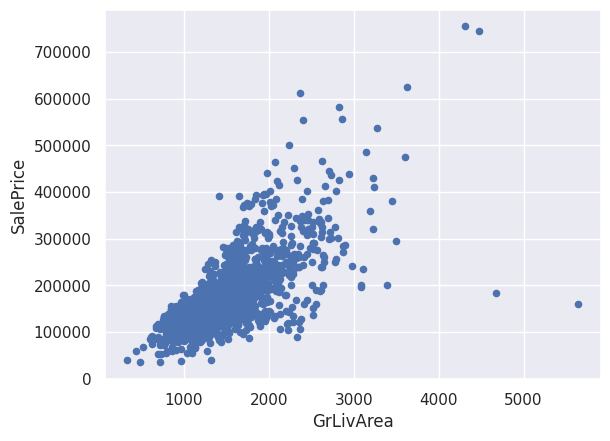

In [14]:
var = 'GrLivArea'
data = pd.concat([dataset_df['SalePrice'], dataset_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [15]:
dataset_df.sort_values(by='GrLivArea', ascending=False)[:2]['GrLivArea']

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [16]:
dataset_df.drop(labels=[1298, 523], axis=0, inplace=True)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

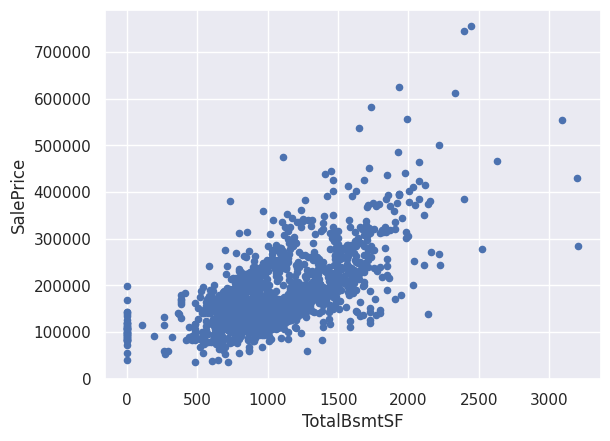

In [17]:
var = 'TotalBsmtSF'
data = pd.concat([dataset_df['SalePrice'], dataset_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [18]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)

In [19]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

2025-11-13 17:44:16.839831: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmphreu0xvp as temporary training directory


In [21]:
train_data = rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:04.409423. Found 1038 examples.
Training model...


I0000 00:00:1763055861.484330      39 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1763055861.485927      39 kernel.cc:783] Collect training examples
I0000 00:00:1763055861.485987      39 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1763055861.486926      39 kernel.cc:401] Number of batches: 2
I0000 00:00:1763055861.486952      39 kernel.cc:402] Number of examples: 1038
I0000 00:00:1763055861.488436      39 data_spec_inference.cc:354] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (7 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1763055861.488479      39 data_spec_inference.cc:354] 5 item(s) have been pr

Model trained in 0:00:01.677387
Compiling model...


I0000 00:00:1763055863.109907      39 decision_forest.cc:761] Model loaded with 300 root(s), 98674 node(s), and 59 input feature(s).
I0000 00:00:1763055863.113218      39 abstract_model.cc:1404] Engine "RandomForestOptPred" built


Model compiled.


In [22]:
from sklearn.metrics import mean_squared_error, r2_score


pred_data = rf.predict(x=valid_ds)

mse = mean_squared_error(valid_ds_pd['SalePrice'], pred_data)
r2_score = r2_score(valid_ds_pd['SalePrice'], pred_data)
print(mse, r2_score)

1/1 [==============================] - 0s 204ms/step
535319265.86854833 0.9156576617664453


/tmp/ipykernel_39/4171561346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], fit=norm)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

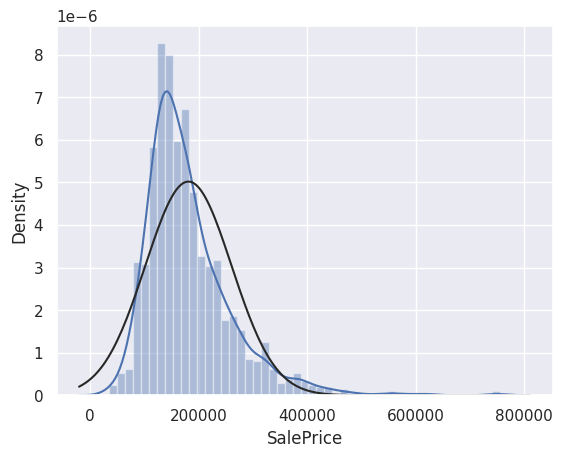

<Figure size 640x480 with 0 Axes>

In [23]:
from scipy.stats import norm

sns.distplot(dataset_df['SalePrice'], fit=norm)
fig = plt.figure()
fig

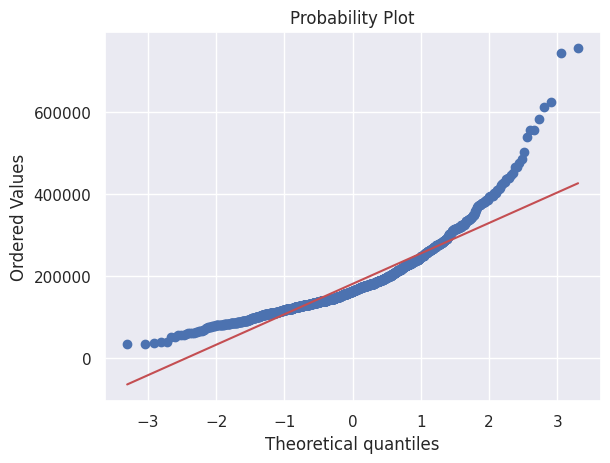

In [24]:
from scipy import stats

res = stats.probplot(dataset_df['SalePrice'], plot=plt)

In [25]:
dataset_df['SalePrice'] = np.log(dataset_df['SalePrice'])

/tmp/ipykernel_39/1805999778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], fit=norm)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

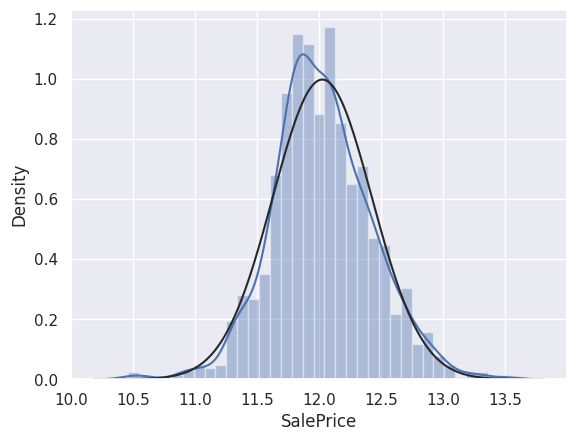

<Figure size 640x480 with 0 Axes>

In [26]:
sns.distplot(dataset_df['SalePrice'], fit=norm)
fig = plt.figure()
fig

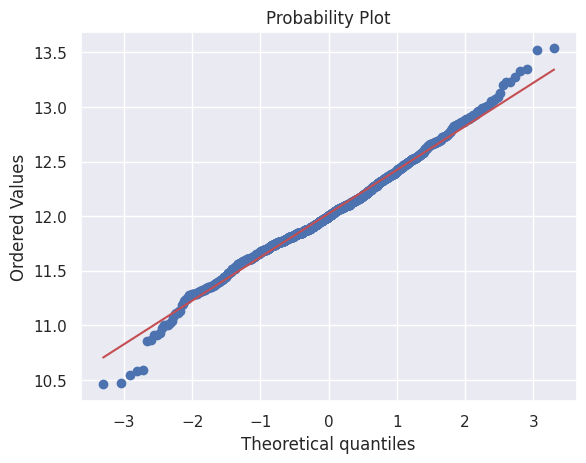

In [27]:
res = stats.probplot(dataset_df['SalePrice'], plot=plt)

/tmp/ipykernel_39/805153112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['GrLivArea'], fit=norm);
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


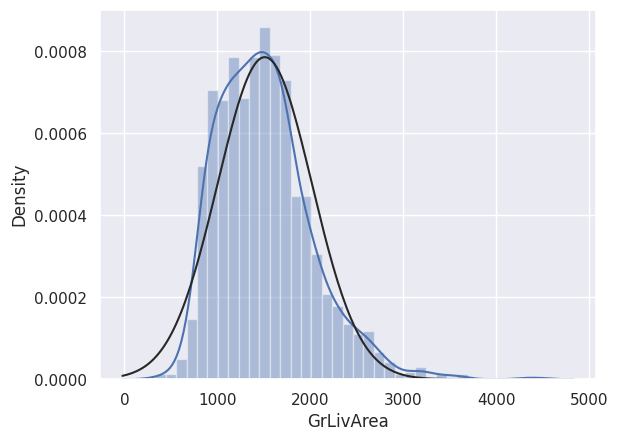

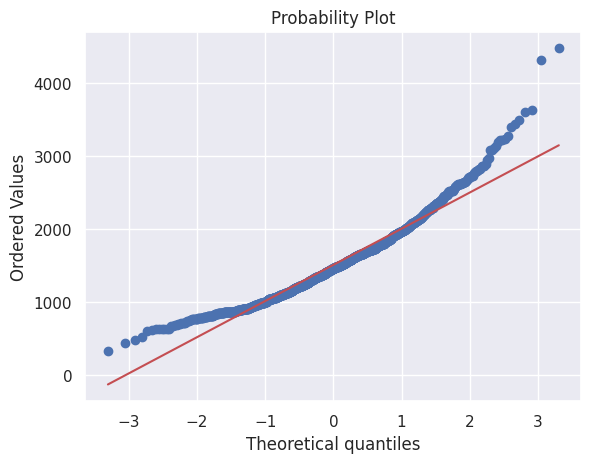

In [28]:
sns.distplot(dataset_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataset_df['GrLivArea'], plot=plt)

In [29]:
dataset_df['GrLivArea'] = np.log(dataset_df['GrLivArea'])

/tmp/ipykernel_39/805153112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['GrLivArea'], fit=norm);
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


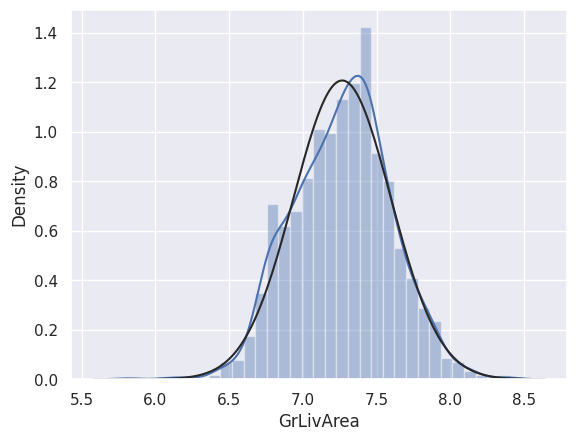

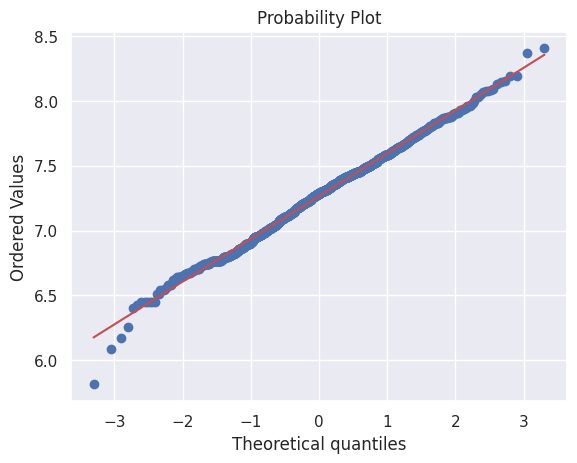

In [30]:
sns.distplot(dataset_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataset_df['GrLivArea'], plot=plt)

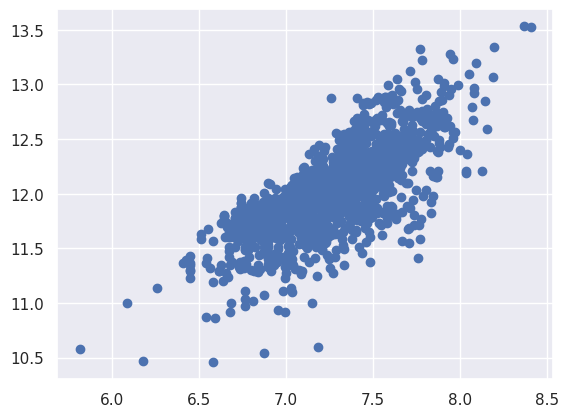

In [31]:
plt.scatter(dataset_df['GrLivArea'], dataset_df['SalePrice']);

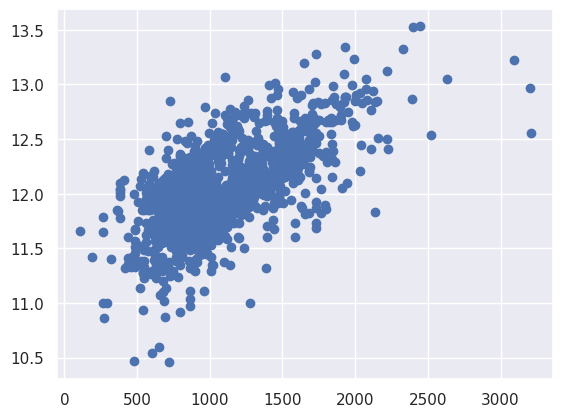

In [32]:
plt.scatter(dataset_df[dataset_df['TotalBsmtSF']>0]['TotalBsmtSF'], dataset_df[dataset_df['TotalBsmtSF']>0]['SalePrice']);

In [33]:
train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
Y_train = train_ds_pd['SalePrice']
Y_test_original = np.exp(valid_ds_pd['SalePrice'])

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

train_ds_pd.drop('SalePrice', axis=1)
valid_ds_pd.drop('SalePrice', axis=1)

continuous_columns = [column for column in train_ds_pd.columns if train_ds_pd[column].dtype in ['float64', 'int64']]
X_train = train_ds_pd[continuous_columns]
X_test = valid_ds_pd[continuous_columns]

In [61]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', 0.5]
        }


search = RandomizedSearchCV(
        model,
        param_grid, 
        n_iter=50,
        cv=5, 
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

search

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [64]:
search.fit(X_train, Y_train)

best_model = search.best_estimator_

y_pred_train = best_model.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [65]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

true_test_pred = np.exp(y_pred_train)

real_rmse = np.sqrt(mean_squared_error(Y_test_original, true_test_pred))
r2_score = r2_score(Y_test_original, true_test_pred)
real_mae = mean_absolute_error(Y_test_original, true_test_pred)
print(real_rmse, r2_score, real_mae)

14290.833724724236 0.9689624100477319 3247.374535868687
